In [3]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.2 MB 25.4 MB/s eta 0:00:01
   ----- ---------------------------------- 2.1/16.2 MB 4.9 MB/s eta 0:00:03
   ------- -------------------------------- 2.9/16.2 MB 4.2 MB/s eta 0:00:04
   --------- ------------------------------ 3.9/16.2 MB 4.6 MB/s eta 0:00:03
   --------- ------------------------------ 3.9/16.2 MB 4.6 MB/s eta 0:00:03
   ----------- ---------------------------- 4.5/16.2 MB 3.8 MB/s eta 0:00:04
   ------------ --------------------------- 5.0/16.2 MB 3.2 MB/s eta 0:00:04
   -------------- ------------------------- 5.8/16.2 MB 3.3 MB/s eta 0:00:04
   -------------- ------------------------- 6.0/16.2 MB 3.2 MB/s eta 0:00:04
   ---------------- ----------------------- 6.6/16.2 MB 3.0 MB/s eta 0:00:04
   ---------------- ----------------------- 6.8/16.2 MB 3.0 MB/s eta 0:00:04
   ------------------ --------------------- 7.6/16.2 MB 3.0 MB/s eta 0:00:03
   --

In [5]:
import pandas as pd           
import matplotlib.pyplot as plt  
import seaborn as sns         
import plotly.express as px   
import geopandas as gpd

In [19]:
#Defining the data frame and calling it load to data as per instructions
df = pd.read_csv("owid-covid-data.csv")

In [21]:
#Preview rows
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511    41128772   
1            64.83                    0.511    41128772   
2            64.83                    0.511    41128772   
3            64.83                    0.511    41128772   
4            64.83                    0.511    41128772   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [23]:
#inspecting the dataset structure
df.columns
df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [25]:
#checking the ones that are just there for vibes lol
#Check for missing values
df.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [27]:
#Clean the dataset
#Convert 'ObservationDate' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [29]:
countries = ['South Africa', 'Chile', 'Botswana', 'China', 'Eswatini', 'France', 'Guam', 'Canada']
df_filtered = df[df['location'].isin(countries)]

In [41]:
#Drop rows with missing critical values
df_filtered = df_filtered.dropna(subset=['iso_code','location', 'date', 'population'])

In [43]:
#Fill missing numeric data
num_cols = ['continent', 'total_cases', 'excess_mortality']
df_filtered[num_cols] = df_filtered[num_cols].fillna(0)



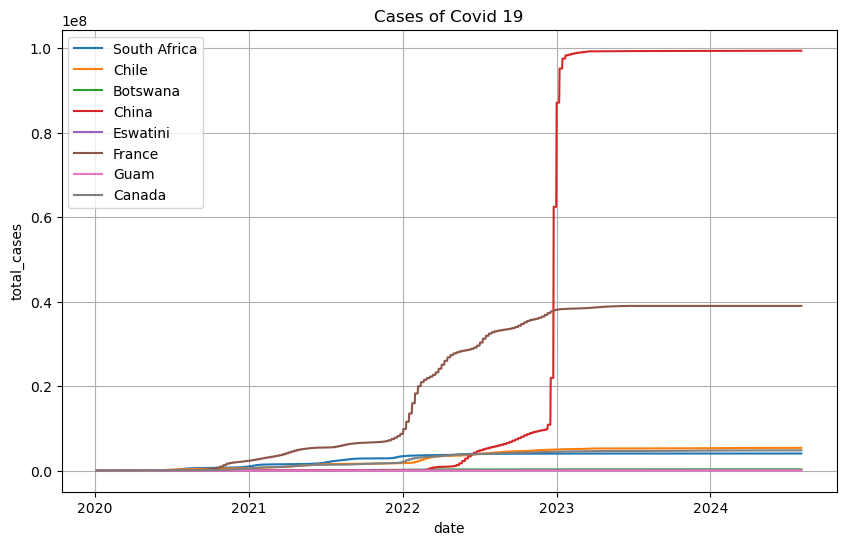

In [49]:
#Plot total confirmed cases over time
plt.figure(figsize=(10,6))
for location in countries:
    data = df_filtered[df_filtered['location'] == location]
    plt.plot(data['date'], data['total_cases'], label=location)
plt.title('Cases of Covid 19')
plt.xlabel('date')
plt.ylabel('total_cases')
plt.legend()
plt.grid(True)
plt.show()

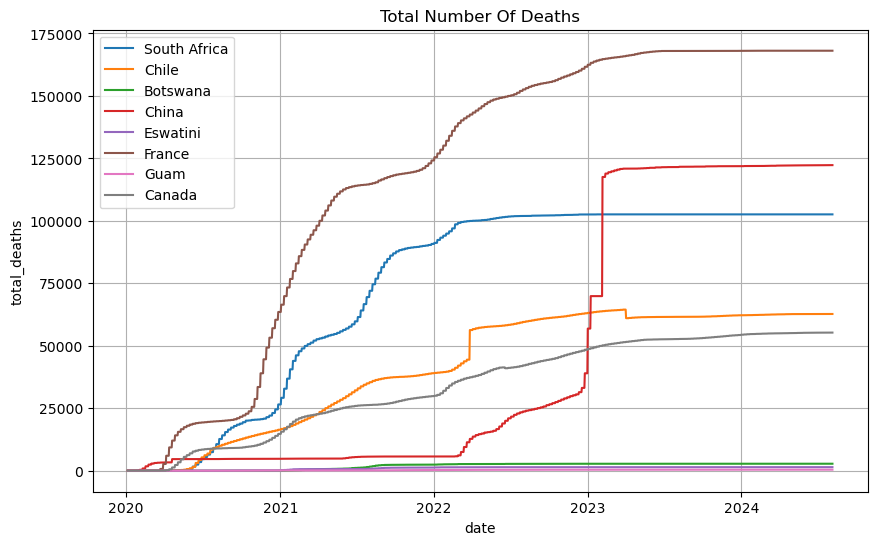

In [53]:
#Plot total deaths over time
plt.figure(figsize=(10,6))
for location in countries:
    data = df_filtered[df_filtered['location'] == location]
    plt.plot(data['date'], data['total_deaths'], label=location)
plt.title('Total Number Of Deaths')
plt.xlabel('date')
plt.ylabel('total_deaths')
plt.legend()
plt.grid(True)
plt.show()

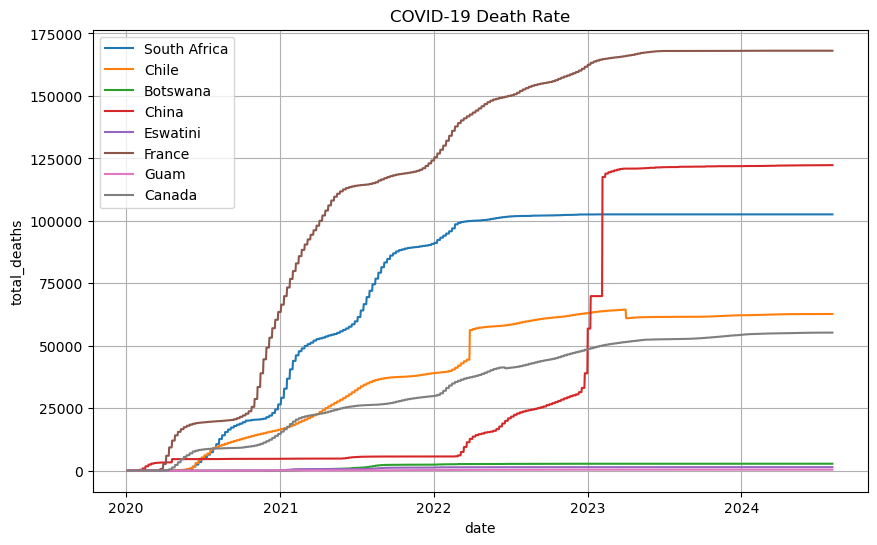

In [59]:
#Calculate and plot death rate over time (Deaths / Confirmed)
plt.figure(figsize=(10,6))
for location in countries:
    data = df_filtered[df_filtered['location'] == location].copy()
    df['death_rate'] = df['total_deaths'] / df['total_cases']
    plt.plot(data['date'], data['total_deaths'], label=location)
plt.title('COVID-19 Death Rate')
plt.xlabel('date')
plt.ylabel('total_deaths')
plt.legend()
plt.grid(True)
plt.show()

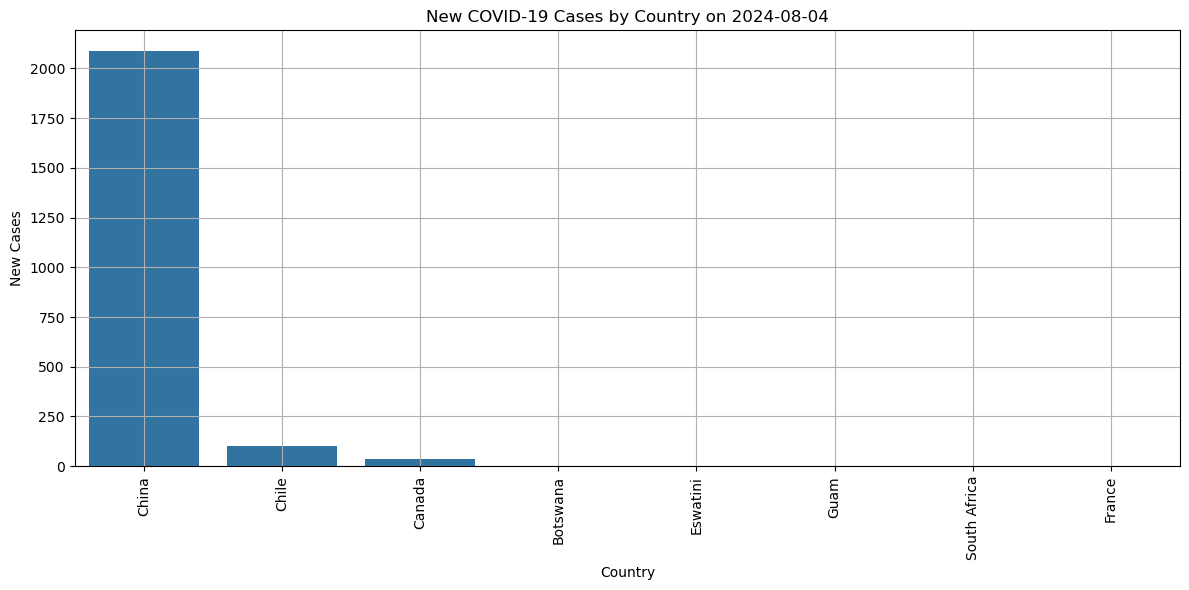

In [61]:
#Bar chart: Compare new cases by country (latest date)
latest_date = df_filtered['date'].max()
latest_data = df_filtered[df_filtered['date'] == latest_date]
latest_data = latest_data.sort_values(by='new_cases', ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=latest_data, x='location', y='new_cases')
plt.title(f'New COVID-19 Cases by Country on {latest_date.date()}')
plt.xlabel('Country')
plt.ylabel('New Cases')
plt.xticks(rotation=90)  
plt.grid(True)
plt.tight_layout()
plt.show()